In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
news_df = pd.read_csv('/content/drive/MyDrive/FAKE NEWS DATASET/train.csv')
news_df = news_df.fillna('')
news_df['content'] = news_df['author'] + ' ' + news_df['title']


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmatize_content(content):
    lemmatized_content = re.sub('[^a-zA-Z]', ' ', content)
    lemmatized_content = lemmatized_content.lower()
    lemmatized_content = lemmatized_content.split()
    lemmatized_content = [lemmatizer.lemmatize(word) for word in lemmatized_content if word not in stopwords.words('english')]
    return " ".join(lemmatized_content)

news_df['content'] = news_df['content'].apply(lemmatize_content)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
X = news_df['content'].values
y = news_df['label'].values
vector = TfidfVectorizer(max_features=5000)
X = vector.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
def plot_graphs(model_name, model, train_accuracy, test_accuracy, y_test, y_pred_test):

    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(6, 4))
    sns.barplot(x=['Training', 'Testing'], y=[train_accuracy, test_accuracy])
    plt.title(f'{model_name} - Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    for i, v in enumerate([train_accuracy, test_accuracy]):
        plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)
    plt.show()

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real News', 'Fake News'], yticklabels=['Real News', 'Fake News'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Performing Exploratory data Analysis


--- Exploratory Data Analysis ---

Dataset Shape: (20800, 6)

Missing Values:
id         0
title      0
author     0
text       0
label      0
content    0
dtype: int64

Class Distribution (Real vs Fake):
label
1    10413
0    10387
Name: count, dtype: int64


<ipython-input-26-f66255395e10>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


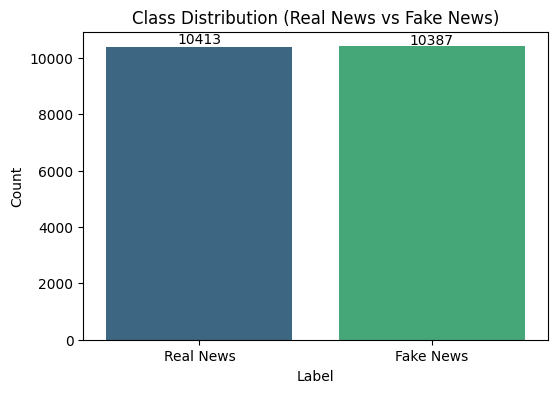

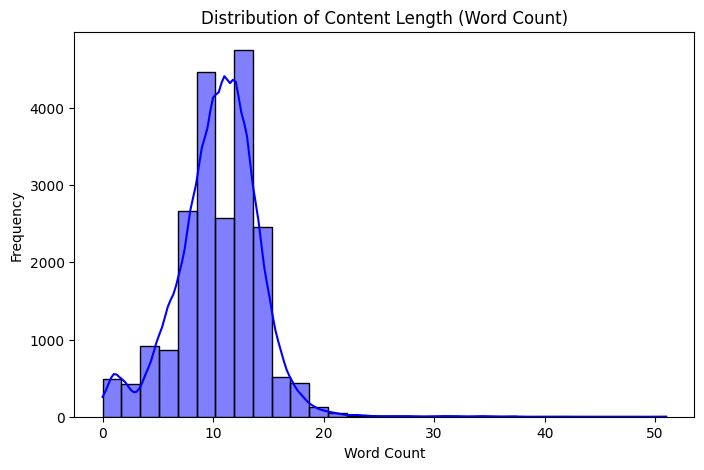

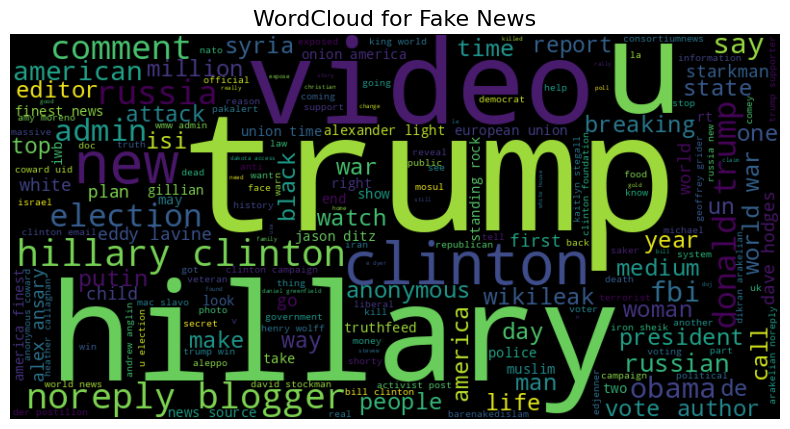

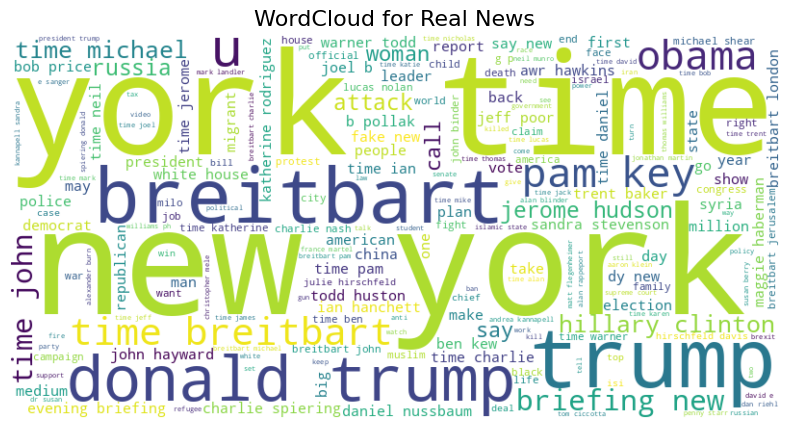


EDA Completed.



In [ ]:
def perform_eda(df):
    print("\n--- Exploratory Data Analysis ---\n")

    print(f"Dataset Shape: {df.shape}")

    print("\nMissing Values:")
    print(df.isnull().sum())

    print("\nClass Distribution (Real vs Fake):")
    class_counts = df['label'].value_counts()
    print(class_counts)

    plt.figure(figsize=(6, 4))
    sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
    plt.title('Class Distribution (Real News vs Fake News)')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.xticks(ticks=[0, 1], labels=['Real News', 'Fake News'])
    for i, v in enumerate(class_counts.values):
        plt.text(i, v + 100, str(v), ha='center', fontsize=10)
    plt.show()

    df['content_length'] = df['content'].apply(lambda x: len(x.split()))
    plt.figure(figsize=(8, 5))
    sns.histplot(df['content_length'], kde=True, bins=30, color='blue')
    plt.title('Distribution of Content Length (Word Count)')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.show()

    from wordcloud import WordCloud
    fake_news = df[df['label'] == 1]['content']
    real_news = df[df['label'] == 0]['content']

    fake_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(fake_news))
    real_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(real_news))

    plt.figure(figsize=(10, 5))
    plt.imshow(fake_wordcloud, interpolation='bilinear')
    plt.title('WordCloud for Fake News', fontsize=16)
    plt.axis('off')
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.imshow(real_wordcloud, interpolation='bilinear')
    plt.title('WordCloud for Real News', fontsize=16)
    plt.axis('off')
    plt.show()



    print("\nEDA Completed.\n")
    df.drop(columns=['content_length'], inplace=True)

perform_eda(news_df)


In [ ]:
data_train=pd.read_csv('/content/drive/MyDrive/FAKE NEWS DATASET/train.csv')
data_train.shape

(20800, 5)

In [ ]:
data_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
data_train.tail()

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


Model : Logistic Regression.Learns the relationship between features (TF-IDF values of words) and labels (real or fake) by fitting a linear model. Predicts based on the probability of the news being fake.




Training Logistic Regression...
Logistic Regression - Training Accuracy: 0.9861177884615384
Logistic Regression - Testing Accuracy: 0.9778846153846154

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2077
           1       0.97      0.99      0.98      2083

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



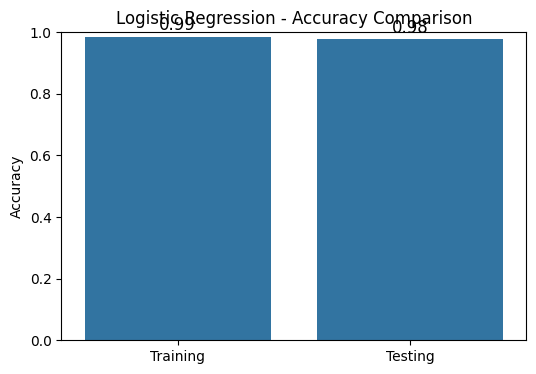

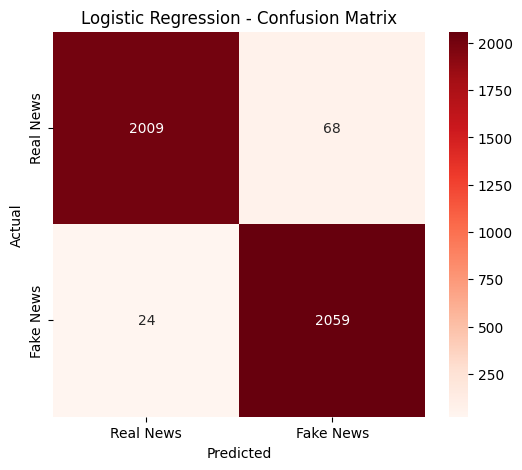


Enter the sample index you want to predict (valid range: 0 to 4999): 4560

Prediction for Sample 4560 using Logistic Regression: Fake News
Actual Label: Fake News
Sample Content: mac slavo violent revolution trump let people remain poised angry revolt robert


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_graphs(model_name, train_accuracy, test_accuracy, y_test, y_pred_test):
    cm = confusion_matrix(y_test, y_pred_test)

    plt.figure(figsize=(6, 4))
    sns.barplot(x=['Training', 'Testing'], y=[train_accuracy, test_accuracy])
    plt.title(f'{model_name} - Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    for i, v in enumerate([train_accuracy, test_accuracy]):
        plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)
    plt.show()

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Real News', 'Fake News'], yticklabels=['Real News', 'Fake News'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def get_valid_sample_index(test_indices):
    while True:
        try:
            sample_index_input = int(input(f"\nEnter the sample index you want to predict (valid range: {min(test_indices)} to {max(test_indices)}): "))
            if sample_index_input not in test_indices:
                print("The selected index is not from the test set. Please select a valid index from the test set.")
            else:
                return sample_index_input
        except ValueError:
            print("Invalid input! Please enter a valid integer.")

def predict_news_by_index(index, model_name, model, test_indices):
    if index not in test_indices:
        print(f"Sample index {index} does not exist in the test set.")
        return

    sample_index = test_indices[index]
    sample_text = news_df.loc[sample_index, 'content']
    actual_label = news_df.loc[sample_index, 'label']

    processed_text = lemmatize_content(sample_text)
    vectorized_text = vector.transform([processed_text])
    prediction = model.predict(vectorized_text)

    print(f"\nPrediction for Sample {index} using {model_name}: {'Fake News' if prediction[0] == 1 else 'Real News'}")
    print("Actual Label:", 'Fake News' if actual_label == 1 else 'Real News')
    print("Sample Content:", sample_text)

print("\nTraining Logistic Regression...")
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_train_logistic = logistic_model.predict(X_train)
y_pred_test_logistic = logistic_model.predict(X_test)

logistic_train_acc = accuracy_score(y_train, y_pred_train_logistic)
logistic_test_acc = accuracy_score(y_test, y_pred_test_logistic)

print("Logistic Regression - Training Accuracy:", logistic_train_acc)
print("Logistic Regression - Testing Accuracy:", logistic_test_acc)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_test_logistic))

plot_graphs('Logistic Regression', logistic_train_acc, logistic_test_acc, y_test, y_pred_test_logistic)

test_indices = news_df.index[news_df.index.isin(X_test.indices)]

sample_index_input = get_valid_sample_index(test_indices)
predict_news_by_index(sample_index_input, "Logistic Regression", logistic_model, test_indices)


Model : Decision Tree. Splits the data into subsets based on feature values (e.g., specific words or phrases), creating rules that predict fake or real news.Creates a tree structure where each node represents a feature (specific word or phrase) and splits the data based on thresholds, forming rules to classify news as real or fake.


Training Decision Tree...
Decision Tree - Training Accuracy: 1.0
Decision Tree - Testing Accuracy: 0.9911057692307692

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2077
           1       0.99      0.99      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160


Enter the sample index you want to predict (valid range: 0 to 4999): 4560

Prediction for Sample 4560 using Decision Tree: Real News
Actual Label: Real News
Sample Content: katharine q seelye fatal boat crash shook lake george serenity brings homicide charge new york time


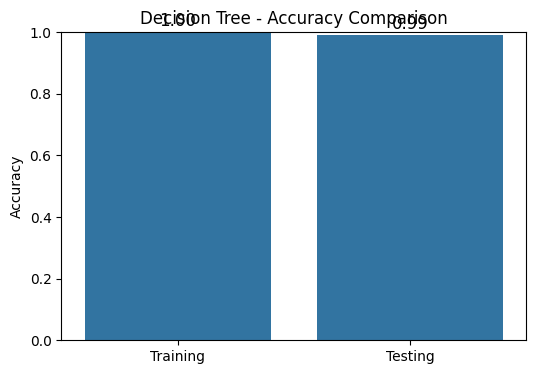

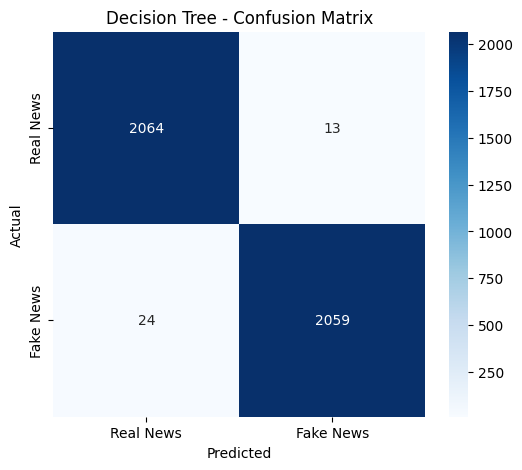

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

news_df['original_index'] = news_df.index

def predict_news_by_index(index, model_name, model, test_indices):
    if index not in test_indices:
        print(f"Sample index {index} is not from the test set. Please select a valid test set index.")
        return

    sample_row = news_df.loc[news_df['original_index'] == index].iloc[0]
    sample_text = sample_row['content']
    actual_label = sample_row['label']

    processed_text = lemmatize_content(sample_text)
    vectorized_text = vector.transform([processed_text])
    prediction = model.predict(vectorized_text)

    print(f"\nPrediction for Sample {index} using {model_name}: {'Fake News' if prediction[0] == 1 else 'Real News'}")
    print("Actual Label:", 'Fake News' if actual_label == 1 else 'Real News')
    print("Sample Content:", sample_text)

print("\nTraining Decision Tree...")
decision_tree_model = DecisionTreeClassifier(random_state=1)
decision_tree_model.fit(X_train, y_train)

y_pred_train = decision_tree_model.predict(X_train)
y_pred_test = decision_tree_model.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"Decision Tree - Training Accuracy: {train_acc}")
print(f"Decision Tree - Testing Accuracy: {test_acc}")
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_test))

results = {}
results['Decision Tree'] = {
    'model': decision_tree_model,
    'train_accuracy': train_acc,
    'test_accuracy': test_acc,
    'classification_report': classification_report(y_test, y_pred_test, output_dict=True),
    'confusion_matrix': confusion_matrix(y_test, y_pred_test)
}

test_indices = news_df.loc[news_df['original_index'].isin(X_test.indices), 'original_index']

def get_valid_sample_index():
    while True:
        try:
            sample_index_input = int(input(f"\nEnter the sample index you want to predict (valid range: {min(test_indices)} to {max(test_indices)}): "))
            if sample_index_input not in test_indices.values:
                print("The selected index is not from the test set. Please select a valid index from the test set.")
            else:
                return sample_index_input
        except ValueError:
            print("Invalid input! Please enter a valid integer.")

sample_index_input = get_valid_sample_index()
predict_news_by_index(sample_index_input, "Decision Tree", decision_tree_model, test_indices)

def plot_graphs_for_decision_tree():
    model_results = results['Decision Tree']
    train_accuracy = model_results['train_accuracy']
    test_accuracy = model_results['test_accuracy']
    cm = model_results['confusion_matrix']

    plt.figure(figsize=(6, 4))
    sns.barplot(x=['Training', 'Testing'], y=[train_accuracy, test_accuracy])
    plt.title('Decision Tree - Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    for i, v in enumerate([train_accuracy, test_accuracy]):
        plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)
    plt.show()

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real News', 'Fake News'], yticklabels=['Real News', 'Fake News'])
    plt.title('Decision Tree - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_graphs_for_decision_tree()


Model : Random Forest . Combines multiple decision trees, each trained on random subsets of data and features, to make a majority-vote prediction, reducing overfitting and improving accuracy.Builds multiple decision trees using random subsets of data and features. Aggregates the predictions (majority voting) to classify news, improving robustness and accuracy.


Training Random Forest...
Random Forest - Training Accuracy: 1.0
Random Forest - Testing Accuracy: 0.9956730769230769

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2077
           1       0.99      1.00      1.00      2083

    accuracy                           1.00      4160
   macro avg       1.00      1.00      1.00      4160
weighted avg       1.00      1.00      1.00      4160



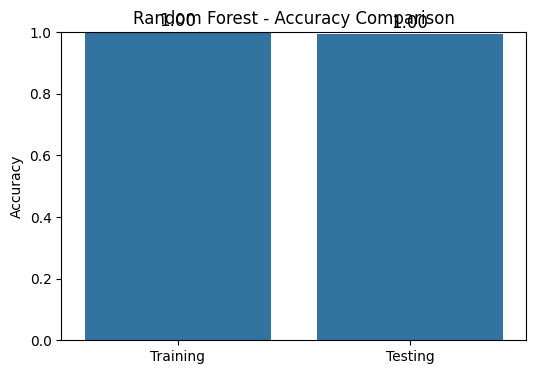

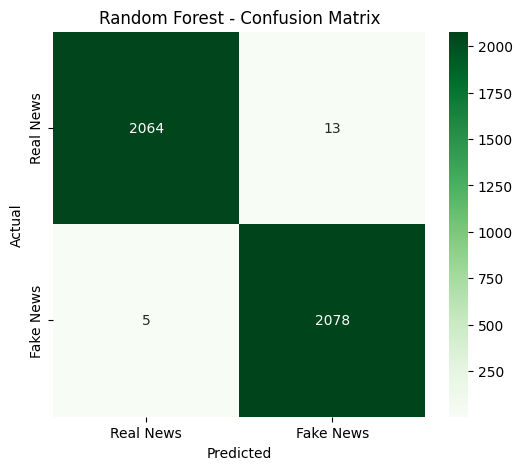


Enter the sample index you want to predict (valid range: 0 to 4999): 4560

Prediction for Sample 4560 using Random Forest: Fake News
Actual Label: Fake News
Sample Content: mac slavo violent revolution trump let people remain poised angry revolt robert


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_graphs(model_name, train_accuracy, test_accuracy, y_test, y_pred_test):
    cm = confusion_matrix(y_test, y_pred_test)

    plt.figure(figsize=(6, 4))
    sns.barplot(x=['Training', 'Testing'], y=[train_accuracy, test_accuracy])
    plt.title(f'{model_name} - Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    for i, v in enumerate([train_accuracy, test_accuracy]):
        plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)
    plt.show()

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Real News', 'Fake News'], yticklabels=['Real News', 'Fake News'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def get_valid_sample_index(test_indices):
    while True:
        try:
            sample_index_input = int(input(f"\nEnter the sample index you want to predict (valid range: {min(test_indices)} to {max(test_indices)}): "))
            if sample_index_input not in test_indices:
                print("The selected index is not from the test set. Please select a valid index from the test set.")
            else:
                return sample_index_input
        except ValueError:
            print("Invalid input! Please enter a valid integer.")

def predict_news_by_index(index, model_name, model, test_indices):
    if index not in test_indices:
        print(f"Sample index {index} does not exist in the test set.")
        return

    sample_index = test_indices[index]
    sample_text = news_df.loc[sample_index, 'content']
    actual_label = news_df.loc[sample_index, 'label']

    processed_text = lemmatize_content(sample_text)
    vectorized_text = vector.transform([processed_text])
    prediction = model.predict(vectorized_text)

    print(f"\nPrediction for Sample {index} using {model_name}: {'Fake News' if prediction[0] == 1 else 'Real News'}")
    print("Actual Label:", 'Fake News' if actual_label == 1 else 'Real News')
    print("Sample Content:", sample_text)

print("\nTraining Random Forest...")
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred_train_rf = random_forest_model.predict(X_train)
y_pred_test_rf = random_forest_model.predict(X_test)

rf_train_acc = accuracy_score(y_train, y_pred_train_rf)
rf_test_acc = accuracy_score(y_test, y_pred_test_rf)

print("Random Forest - Training Accuracy:", rf_train_acc)
print("Random Forest - Testing Accuracy:", rf_test_acc)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_test_rf))

plot_graphs('Random Forest', rf_train_acc, rf_test_acc, y_test, y_pred_test_rf)

test_indices = news_df.index[news_df.index.isin(X_test.indices)]

sample_index_input = get_valid_sample_index(test_indices)
predict_news_by_index(sample_index_input, "Random Forest", random_forest_model, test_indices)


Model : Multinomial Naive Bayes. Assumes features (e.g., words) are independent and calculates probabilities for fake or real news based on word distributions.Computes the likelihood of each class (real or fake) using the frequency of words, assuming word independence. Predicts based on the highest probability.


Training Naive Bayes...
Naive Bayes - Training Accuracy: 0.9685697115384615
Naive Bayes - Testing Accuracy: 0.9533653846153847

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2077
           1       0.99      0.92      0.95      2083

    accuracy                           0.95      4160
   macro avg       0.96      0.95      0.95      4160
weighted avg       0.96      0.95      0.95      4160



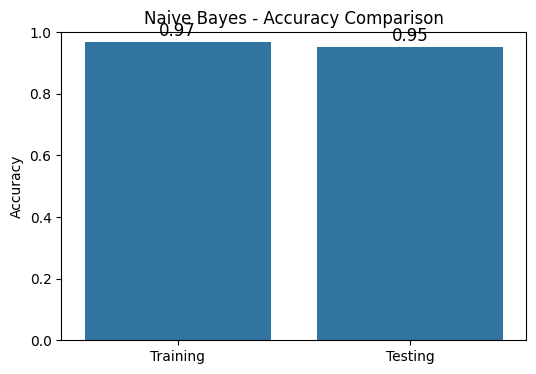

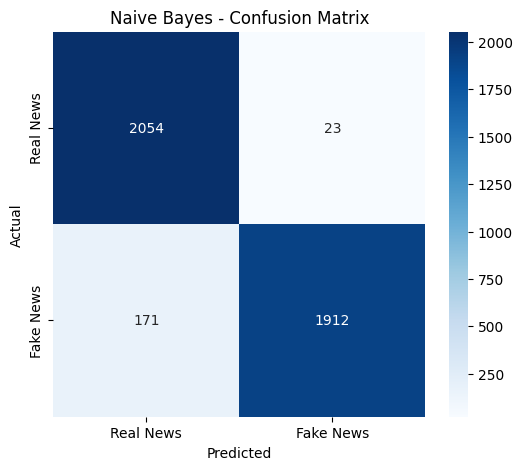


Enter the sample index you want to predict (valid range: 0 to 4999): 4560

Prediction for Sample 4560 using Naive Bayes: Fake News
Actual Label: Fake News
Sample Content: mac slavo violent revolution trump let people remain poised angry revolt robert


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_graphs(model_name, train_accuracy, test_accuracy, y_test, y_pred_test):
    cm = confusion_matrix(y_test, y_pred_test)

    plt.figure(figsize=(6, 4))
    sns.barplot(x=['Training', 'Testing'], y=[train_accuracy, test_accuracy])
    plt.title(f'{model_name} - Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    for i, v in enumerate([train_accuracy, test_accuracy]):
        plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)
    plt.show()

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real News', 'Fake News'], yticklabels=['Real News', 'Fake News'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def get_valid_sample_index(test_indices):
    while True:
        try:
            sample_index_input = int(input(f"\nEnter the sample index you want to predict (valid range: {min(test_indices)} to {max(test_indices)}): "))
            if sample_index_input not in test_indices:
                print("The selected index is not from the test set. Please select a valid index from the test set.")
            else:
                return sample_index_input
        except ValueError:
            print("Invalid input! Please enter a valid integer.")

def predict_news_by_index(index, model_name, model, test_indices):
    if index not in test_indices:
        print(f"Sample index {index} does not exist in the test set.")
        return

    sample_index = test_indices[index]
    sample_text = news_df.loc[sample_index, 'content']
    actual_label = news_df.loc[sample_index, 'label']

    processed_text = lemmatize_content(sample_text)
    vectorized_text = vector.transform([processed_text])
    prediction = model.predict(vectorized_text)

    print(f"\nPrediction for Sample {index} using {model_name}: {'Fake News' if prediction[0] == 1 else 'Real News'}")
    print("Actual Label:", 'Fake News' if actual_label == 1 else 'Real News')
    print("Sample Content:", sample_text)

print("\nTraining Naive Bayes...")
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

y_pred_train_nb = naive_bayes_model.predict(X_train)
y_pred_test_nb = naive_bayes_model.predict(X_test)

nb_train_acc = accuracy_score(y_train, y_pred_train_nb)
nb_test_acc = accuracy_score(y_test, y_pred_test_nb)

print("Naive Bayes - Training Accuracy:", nb_train_acc)
print("Naive Bayes - Testing Accuracy:", nb_test_acc)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_test_nb))

plot_graphs('Naive Bayes', nb_train_acc, nb_test_acc, y_test, y_pred_test_nb)

test_indices = news_df.index[news_df.index.isin(X_test.indices)]

sample_index_input = get_valid_sample_index(test_indices)
predict_news_by_index(sample_index_input, "Naive Bayes", naive_bayes_model, test_indices)



Training K-Nearest Neighbors...
K-Nearest Neighbors - Training Accuracy: 0.5805288461538461
K-Nearest Neighbors - Testing Accuracy: 0.5514423076923077

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.10      0.18      2077
           1       0.53      1.00      0.69      2083

    accuracy                           0.55      4160
   macro avg       0.76      0.55      0.44      4160
weighted avg       0.76      0.55      0.44      4160



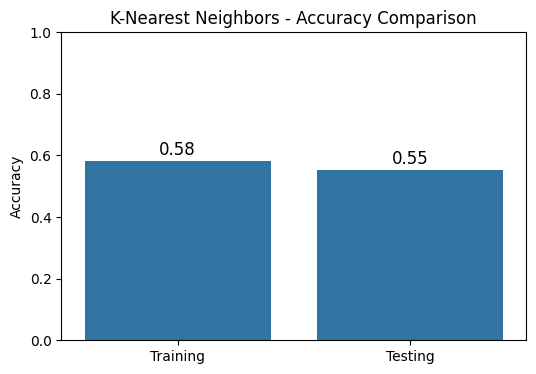

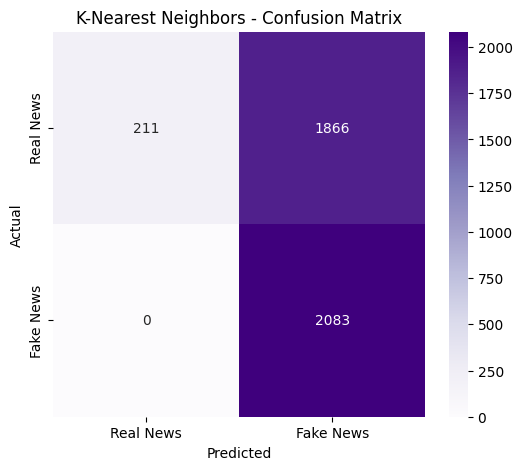


Enter the sample index you want to predict (valid range: 0 to 4999): 4529

Prediction for Sample 4529 using K-Nearest Neighbors: Fake News
Actual Label: Real News
Sample Content: jon caramanica review bruno mar delivers decade funk k magic new york time


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_graphs(model_name, train_accuracy, test_accuracy, y_test, y_pred_test):
    cm = confusion_matrix(y_test, y_pred_test)

    plt.figure(figsize=(6, 4))
    sns.barplot(x=['Training', 'Testing'], y=[train_accuracy, test_accuracy])
    plt.title(f'{model_name} - Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    for i, v in enumerate([train_accuracy, test_accuracy]):
        plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)
    plt.show()

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Real News', 'Fake News'], yticklabels=['Real News', 'Fake News'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def get_valid_sample_index(test_indices):
    while True:
        try:
            sample_index_input = int(input(f"\nEnter the sample index you want to predict (valid range: {min(test_indices)} to {max(test_indices)}): "))
            if sample_index_input not in test_indices:
                print("The selected index is not from the test set. Please select a valid index from the test set.")
            else:
                return sample_index_input
        except ValueError:
            print("Invalid input! Please enter a valid integer.")

def predict_news_by_index(index, model_name, model, test_indices):
    if index not in test_indices:
        print(f"Sample index {index} does not exist in the test set.")
        return

    sample_index = test_indices[index]
    sample_text = news_df.loc[sample_index, 'content']
    actual_label = news_df.loc[sample_index, 'label']

    processed_text = lemmatize_content(sample_text)
    vectorized_text = vector.transform([processed_text])
    prediction = model.predict(vectorized_text)

    print(f"\nPrediction for Sample {index} using {model_name}: {'Fake News' if prediction[0] == 1 else 'Real News'}")
    print("Actual Label:", 'Fake News' if actual_label == 1 else 'Real News')
    print("Sample Content:", sample_text)

print("\nTraining K-Nearest Neighbors...")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_train_knn = knn_model.predict(X_train)
y_pred_test_knn = knn_model.predict(X_test)

knn_train_acc = accuracy_score(y_train, y_pred_train_knn)
knn_test_acc = accuracy_score(y_test, y_pred_test_knn)

print("K-Nearest Neighbors - Training Accuracy:", knn_train_acc)
print("K-Nearest Neighbors - Testing Accuracy:", knn_test_acc)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_test_knn))

plot_graphs('K-Nearest Neighbors', knn_train_acc, knn_test_acc, y_test, y_pred_test_knn)


test_indices = news_df.index[news_df.index.isin(X_test.indices)]

sample_index_input = get_valid_sample_index(test_indices)
predict_news_by_index(sample_index_input, "K-Nearest Neighbors", knn_model, test_indices)


Enter the model name (Logistic Regression, Naive Bayes, Random Forest, K-Nearest Neighbors, Decision Tree): Random Forest

Training Random Forest...
Random Forest - Training Accuracy: 1.00
Random Forest - Testing Accuracy: 1.00

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2077
           1       0.99      1.00      1.00      2083

    accuracy                           1.00      4160
   macro avg       1.00      1.00      1.00      4160
weighted avg       1.00      1.00      1.00      4160



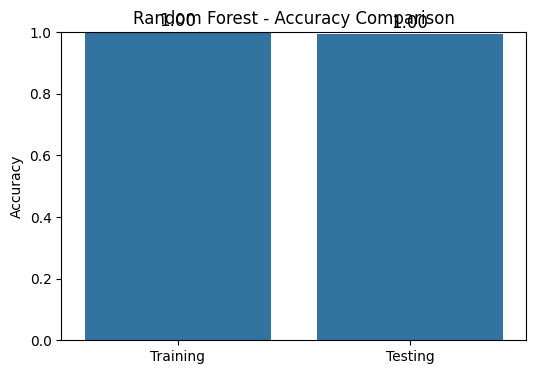

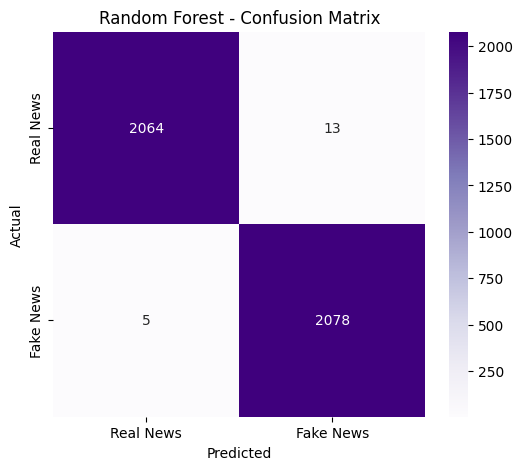


Enter the test set index you want to predict (0 to 4159): 4000

Prediction for Test Sample 4000 using Random Forest: Fake News
Actual Label: Fake News
Sample Content: barenakedislam pennsylvania gun store tell customer muslim hillary supporter welcome


In [ ]:
def train_and_evaluate(model_name):
    """
    Train and evaluate the specified model.
    """
    if model_name == 'Logistic Regression':
        model = LogisticRegression(max_iter=1000)
    elif model_name == 'Naive Bayes':
        model = MultinomialNB()
    elif model_name == 'Random Forest':
        model = RandomForestClassifier(n_estimators=100, random_state=42)
    elif model_name == 'K-Nearest Neighbors':
        model = KNeighborsClassifier(n_neighbors=5)
    elif model_name == 'Decision Tree':
        model = DecisionTreeClassifier(random_state=1)
    else:
        print("Invalid model name. Please choose a valid option.")
        return None

    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    print(f"{model_name} - Training Accuracy: {train_accuracy:.2f}")
    print(f"{model_name} - Testing Accuracy: {test_accuracy:.2f}")
    print("\nClassification Report on Test Set:")
    print(classification_report(y_test, y_pred_test))

    plot_graphs(model_name, train_accuracy, test_accuracy, y_test, y_pred_test)

    return model


def predict_news_by_test_index(test_index, model_name, model):
    """
    Predict the news category for a given test set index.
    """
    if test_index < 0 or test_index >= len(X_test.indices):
        print(f"Test set index {test_index} does not exist. Please enter a valid index.")
        return

    original_index = X_test.indices[test_index]
    sample_row = news_df.iloc[original_index]
    sample_text = sample_row['content']
    actual_label = sample_row['label']

    processed_text = lemmatize_content(sample_text)
    vectorized_text = vector.transform([processed_text])
    prediction = model.predict(vectorized_text)

    print(f"\nPrediction for Test Sample {test_index} using {model_name}: {'Fake News' if prediction[0] == 1 else 'Real News'}")
    print("Actual Label:", 'Fake News' if actual_label == 1 else 'Real News')
    print("Sample Content:", sample_text)


def main():
    """
    Main function to train the model and make predictions.
    """
    model_name = input("Enter the model name (Logistic Regression, Naive Bayes, Random Forest, K-Nearest Neighbors, Decision Tree): ").strip()
    model = train_and_evaluate(model_name)

    if model is not None:
        while True:
            try:
                test_index_input = int(input(f"\nEnter the test set index you want to predict (0 to {X_test.shape[0] - 1}): "))
                predict_news_by_test_index(test_index_input, model_name, model)
                break
            except ValueError:
                print("Invalid input! Please enter a valid integer.")

main()
